# 4D Sphere and the Big Five Personality Traits

In [1]:
from IPython.display import HTML
HTML(filename='media/image_layout.html')

In this notebook we will be treating the Big Five Personality Traits as coordinates of a point in 5D space. 

We will then verify whether these points lay outside of a 5D Ball (mathematically, the surface of a 5D ball is a 4D sphere).

Finally, we will extract an 'extreme personality' feature.


### Loading Personality Test Data

In [2]:
import numpy as np
import pandas as pd
import itertools

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Latex

pd.set_option('max_columns', None)
sns.set()

In [4]:
data_url = 'data/data-final.csv'
data = pd.read_csv(data_url, sep='\t')

data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


### Removing missing values

In [5]:
print(data.shape)
print(data.isna().sum())

(1015341, 110)
EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
                         ... 
endelapse                   0
IPC                         0
country                    77
lat_appx_lots_of_err        0
long_appx_lots_of_err       0
Length: 110, dtype: int64


In [6]:
data = data.dropna()
print(f'Rows without missing values{data.shape[0]}')

Rows without missing values1012050


In [7]:
data.loc[data.EXT7 == 0].head()  # Found some hidden missing values, some or all questions have 0.0 value in given row

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
142,4.0,1.0,5.0,2.0,5.0,1.0,0.0,2.0,5.0,3.0,3.0,3.0,4.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,2.0,5.0,3.0,4.0,2.0,3.0,1.0,4.0,4.0,4.0,1.0,4.0,2.0,3.0,4.0,4.0,4.0,2.0,4.0,3.0,5.0,1.0,4.0,1.0,4.0,2.0,4.0,4.0,4.0,4.0,10606.0,3780.0,2926.0,2428.0,3416.0,2660.0,0.0,7745.0,3833.0,6580.0,4221.0,2538.0,4222.0,2778.0,5408.0,3832.0,2514.0,4694.0,3001.0,1654.0,3352.0,13968.0,4702.0,3951.0,5284.0,4634.0,10390.0,7053.0,3266.0,2693.0,25153.0,5136.0,5012.0,3599.0,6912.0,4826.0,2156.0,3382.0,2655.0,4561.0,2118.0,7674.0,6852.0,2358.0,3306.0,6720.0,2862.0,2739.0,2853.0,2924.0,2016-03-03 04:30:43,1920.0,1200.0,1.0,243.0,11,1,NO,59.9127,10.7414
318,1.0,5.0,1.0,5.0,2.0,4.0,0.0,0.0,1.0,5.0,5.0,2.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,3.0,4444.0,1196.0,3355.0,1944.0,1164.0,2361.0,0.0,0.0,3367.0,2588.0,3646.0,1852.0,2880.0,2080.0,2400.0,2101.0,6276.0,2208.0,2204.0,2859.0,215001.0,3552.0,1584.0,2833.0,2265.0,4331.0,2728.0,9951.0,4906.0,2121.0,2420.0,3933.0,1496.0,1552.0,2080.0,1012.0,2669.0,1240.0,3953.0,3972.0,4646.0,2536.0,2380.0,3150.0,3660.0,3332.0,21162.0,1748.0,2392.0,1104.0,2016-03-03 06:52:49,1920.0,1080.0,13.0,370.0,13,20,US,30.6586,-88.3535
419,2.0,5.0,1.0,4.0,1.0,5.0,0.0,3.0,0.0,5.0,3.0,4.0,3.0,4.0,2.0,4.0,3.0,3.0,2.0,4.0,4.0,5.0,2.0,5.0,4.0,4.0,1.0,4.0,2.0,3.0,3.0,3.0,0.0,3.0,3.0,4.0,2.0,1.0,2.0,5.0,3.0,2.0,4.0,1.0,4.0,2.0,5.0,1.0,3.0,5.0,7193.0,4934.0,4728.0,2681.0,1558.0,4386.0,0.0,13610.0,0.0,2879.0,5059.0,4354.0,2613.0,4942.0,11127.0,2878.0,4450.0,30644.0,23755.0,49980.0,5152.0,2274.0,40603.0,5375.0,4819.0,7001.0,7065.0,900.0,9616.0,5007.0,5295.0,6672.0,0.0,4157.0,4922.0,2543.0,5056.0,1112.0,3504.0,6543.0,3802.0,5684.0,2315.0,6917.0,3192.0,3601.0,1988.0,4411.0,3556.0,3320.0,2016-03-03 08:39:24,1280.0,800.0,32.0,397.0,68,1,MM,22.0,98.0
485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-03-03 09:25:54,375.0,667.0,26605.0,26588.0,24935,1,US,44.7457,-91.5132
613,1.0,1.0,5.0,4.0,4.0,1.0,0.0,2.0,5.0,3.0,1.0,3.0,5.0,1.0,3.0,5.0,0.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0,5.0,0.0,5.0,5.0,4.0,1.0,5.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,2168.0,12403.0,4089.0,4380.0,2211.0,2018.0,0.0,3883.0,2102.0,3502.0,1004.0,2292.0,1359.0,2423.0,3560.0,2700.0,0.0,3515.0,1701.0,4039.0,3990.0,2203.0,6028.0,4969.0,5544.0,4083.0,0.0,3800.0,1454.0,2961.0,1869.0,1879.0,6387.0,2409.0,4401.0,3156.0,2536.0,2728.0,1803.0,3782.0,2247.0,3271.0,4799.0,6868.0,1685.0,2356.0,3917.0,1072.0,1231.0,1079.0,2016-03-03 10:36:22,768.0,1024.0,5.0,165.0,19,1,GB,54.522,-1.355


In [8]:
ext_cols = [f'EXT{str(i)}' for i in range(1, 11)]
est_cols = [f'EST{str(i)}' for i in range(1, 11)]
agr_cols = [f'AGR{str(i)}' for i in range(1, 11)]
csn_cols = [f'CSN{str(i)}' for i in range(1, 11)]
opn_cols = [f'OPN{str(i)}' for i in range(1, 11)]
question_cols = ext_cols + est_cols + agr_cols + csn_cols + opn_cols

In [9]:
mask1 = False
for col in question_cols:
    mask1 = mask1 | (data[col] == 0)
any_zero_value_data = data[mask1]
print(f'Rows with at least 1 zero-value question: {any_zero_value_data.shape[0]}')
any_zero_value_data.head()

Rows with at least 1 zero-value question: 138877


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
8,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,4.0,4.0,3.0,3.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,4.0,4.0,1.0,5.0,1.0,4.0,1.0,5.0,2.0,5.0,5.0,3973.0,2970.0,7239.0,2586.0,2235.0,5071.0,2719.0,5806.0,2986.0,3102.0,2453.0,4553.0,4470.0,8242.0,4772.0,4070.0,5655.0,5339.0,6390.0,3203.0,2601.0,2486.0,2853.0,2667.0,2668.0,2186.0,4220.0,1867.0,2685.0,3387.0,4387.0,5122.0,2636.0,0.0,1901.0,7473.0,2353.0,2653.0,5154.0,3086.0,2834.0,2936.0,2052.0,3720.0,1684.0,2736.0,4086.0,5037.0,2935.0,1135.0,2016-03-03 02:05:27,2560.0,1440.0,2.0,181.0,4,1,GB,53.423,-2.2166
13,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,4.0,5.0,3.0,3.0,4.0,5.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,0.0,3.0,1.0,3.0,2.0,5.0,3.0,4.0,1.0,5.0,3.0,4.0,3.0,5.0,1.0,4.0,1.0,2.0,2.0,4.0,5.0,5.0,3.0,3853.0,1619.0,1435.0,918.0,917.0,2269.0,1734.0,1252.0,1436.0,700.0,1436.0,1903.0,934.0,1299.0,2153.0,1703.0,2553.0,3236.0,2037.0,750.0,9794.0,6174.0,5706.0,5622.0,2253.0,1652.0,5290.0,0.0,5106.0,2620.0,1768.0,2669.0,1819.0,12967.0,1401.0,1785.0,1535.0,2736.0,1484.0,3520.0,1434.0,1768.0,2069.0,1869.0,1418.0,2736.0,1618.0,1335.0,1434.0,1718.0,2016-03-03 02:10:50,1920.0,1080.0,2.0,129.0,5,1,GB,53.8,-1.5833
18,4.0,2.0,5.0,3.0,4.0,4.0,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,3.0,4.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,4.0,0.0,3.0,5.0,3.0,1.0,5.0,3.0,2.0,1.0,2.0,4.0,1.0,5.0,1.0,3.0,5.0,4.0,2.0,5.0,3.0,15771.0,7379.0,53546.0,4563.0,3381.0,10248.0,3100.0,4623.0,5820.0,5583.0,9215.0,2783.0,3997.0,141423.0,4690.0,4703.0,7147.0,3549.0,3452.0,4284.0,2422.0,4034.0,2848.0,2086.0,3998.0,2654.0,39228.0,2986.0,3366.0,98375.0,0.0,9418.0,3053.0,5168.0,4533.0,5996.0,2655.0,10151.0,4852.0,3984.0,7751.0,3217.0,2702.0,3998.0,3162.0,25811.0,12275.0,12978.0,4282.0,2950.0,2016-03-03 02:16:17,1280.0,768.0,15.0,592.0,39,1,ZA,-29.0,24.0
23,3.0,4.0,4.0,3.0,3.0,4.0,2.0,2.0,0.0,5.0,5.0,4.0,5.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,4.0,1.0,5.0,1.0,4.0,4.0,4.0,1.0,4.0,5.0,1.0,5.0,5.0,5.0,3.0,3.0,5.0,5.0,4.0,5.0,4.0,5.0,1.0,5.0,4.0,5.0,4.0,25037.0,14300.0,10632.0,11616.0,16800.0,7100.0,13751.0,19083.0,0.0,7900.0,10434.0,3367.0,5201.0,8284.0,8054.0,15117.0,6900.0,8350.0,5267.0,5418.0,1184.0,13532.0,8952.0,6434.0,5200.0,14333.0,6348.0,1334.0,7567.0,7615.0,11950.0,8350.0,5916.0,8366.0,8196.0,9316.0,6734.0,10150.0,7083.0,12184.0,6949.0,7401.0,5300.0,9116.0,5084.0,6884.0,6250.0,8266.0,7517.0,5666.0,2016-03-03 02:22:24,320.0,568.0,31.0,435.0,19,1,BR,-23.5475,-46.6361
34,2.0,2.0,0.0,2.0,5.0,1.0,2.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,5.0,2.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,5.0,4.0,5.0,1.0,4.0,4.0,2.0,2.0,1.0,2.0,6614.0,3253.0,0.0,2948.0,2886.0,5788.0,7362.0,3486.0,5833.0,1864.0,9658.0,4485.0,1668.0,5530.0,2208.0,7753.0,3079.0,3923.0,3539.0,3557.0,3635.0,6331.0,2160.0,2254.0,3378.0,10014.0,2161.0,9255.0,4618.0,5679.0,6474.0,3144.0,6786.0,5788.0,8226.0,3362.0,4882.0,5530.0,2792.0,3688.0,3057.0,12574.0,2926.0,7642.0,5108.0,3307.0,5445.0,5451.0,6004.0,3237.0,2016-03-03 02:35:21,1536.0,864.0,6.0,243.0,10,1,GB,52.75,-3.8833


In [10]:
mask2 = True
for col in question_cols:
    mask2 = mask2 & (data[col] == 0)
all_zero_value_data = data[mask2]
print(f'Rows with all zero-value questions: {all_zero_value_data.shape[0]}')
all_zero_value_data.head()

Rows with all zero-value questions: 2093


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-03-03 09:25:54,375.0,667.0,26605.0,26588.0,24935,1,US,44.7457,-91.5132
1168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-03-03 18:08:48,1366.0,768.0,4.0,32.0,12,28,US,43.1548,-77.6156
2407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-03-04 13:42:52,375.0,667.0,6.0,8.0,6,1,US,37.2707,-76.7075
2619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-03-04 18:36:08,1324.0,745.0,4.0,10.0,22,4,US,33.9086,-81.0806
2641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-03-04 19:04:11,360.0,640.0,17.0,7.0,8,1,AU,-27.0,133.0


In [11]:
data = data[~mask1]

### Renormalizing answers values

Since questions aren't consistent with a "the higher the score, the higher the trait" mapping, we will be fixing this by hand.

In [12]:
low_traits = ['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10',
              'EST2', 'EST4', 
              'AGR1', 'AGR3', 'AGR5', 'AGR7',
              'CSN2', 'CSN4', 'CSN6', 'CSN8',
              'OPN2', 'OPN4', 'OPN6']
high_traits = list(set(question_cols) - set(low_traits))

In [13]:
low_map = {k: 3 - k for k in range(1, 6)}
high_map = {k: k - 3 for k in range(1,6)}
data[low_traits] = data[low_traits].replace(low_map)
data[high_traits] = data[high_traits].replace(high_map)

### Trait values of every question

In [14]:
def questions_histogram(cols, color):
    fig, axes = plt.subplots(2, 5, figsize=(16, 8))
    for i in range(2):
        for j in range(5):
            sns.histplot(data=data[cols[5* i + j]], ax=axes[i,j], discrete=True, 
                             color=color)
            if j != 0:
                axes[i,j].set_ylabel('')

Extraversion value count


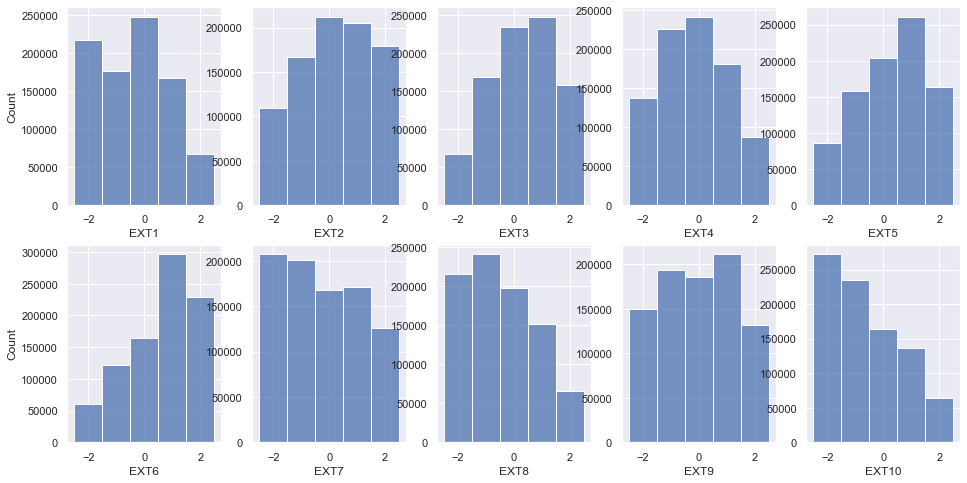

In [15]:
print('Extraversion value count')
questions_histogram(ext_cols, color='C0')

Neuroticism value count


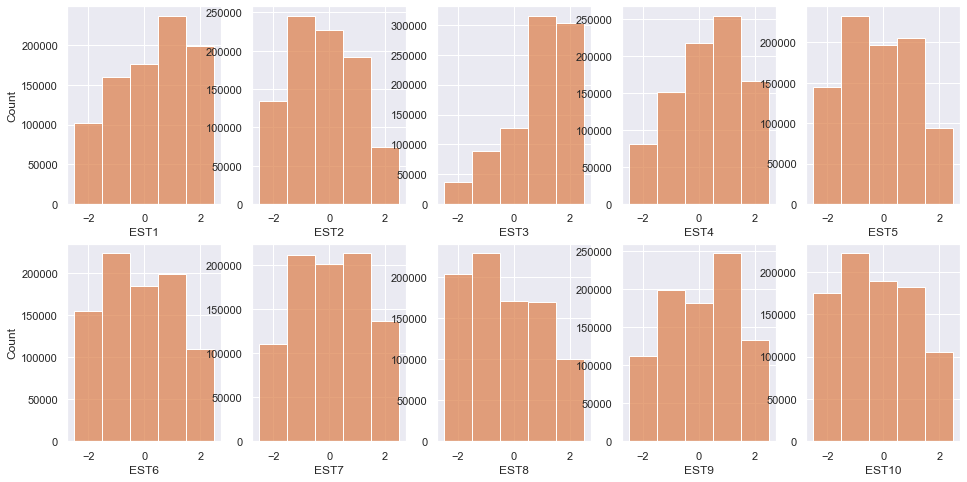

In [16]:
print('Neuroticism value count')
questions_histogram(est_cols, color='C1')

Agreeableness value count


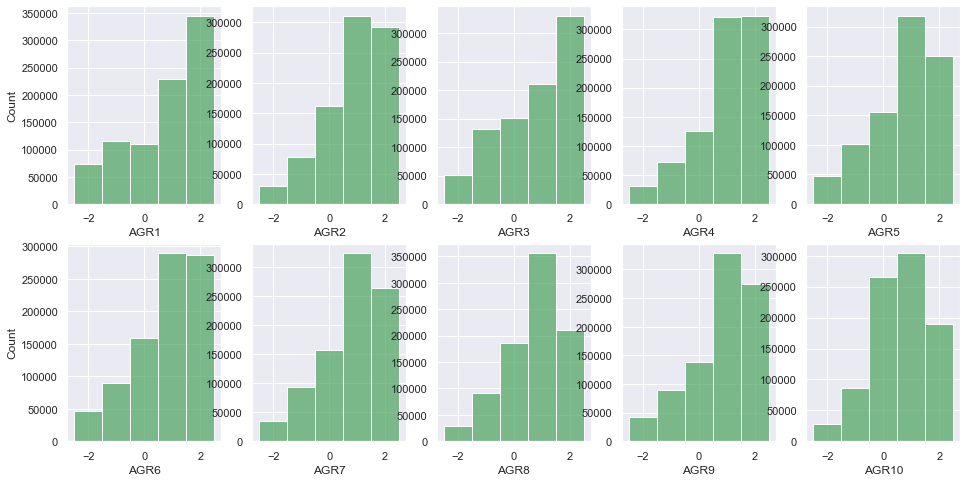

In [17]:
print('Agreeableness value count')
questions_histogram(agr_cols, color='C2')

Conscientiousness value count


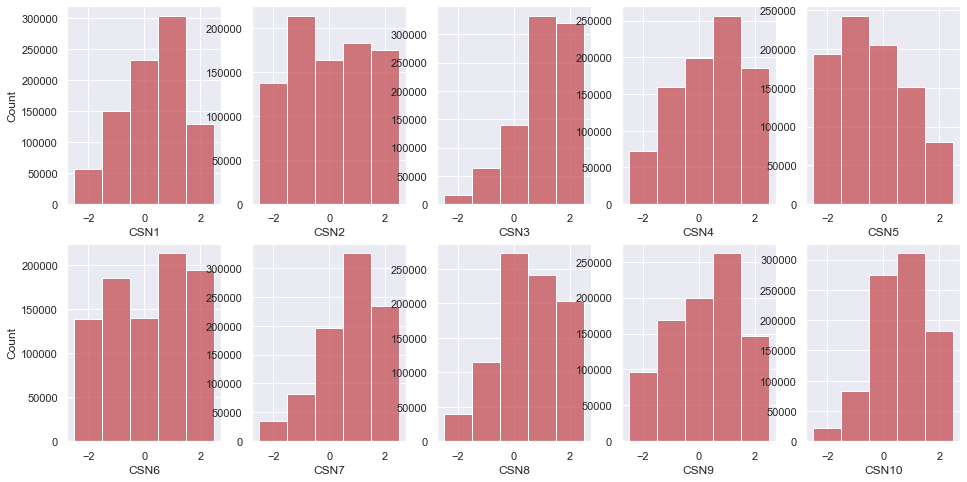

In [18]:
print('Conscientiousness value count')
questions_histogram(csn_cols, color='C3')

Openness value count


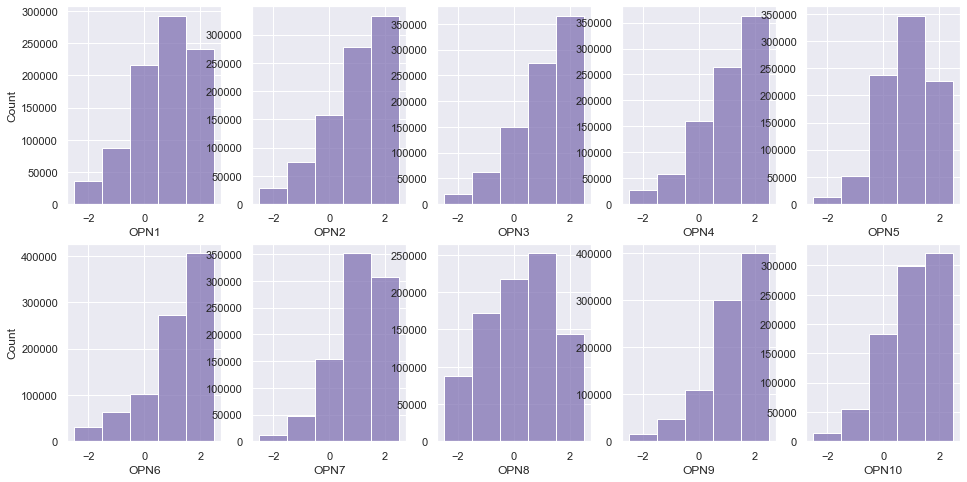

In [19]:
print('Openness value count')
questions_histogram(opn_cols, color='C4')

### Getting our 5 trait scores

In [20]:
def score_trait(row, question_cols):
    score = 0
    for i, question in enumerate(question_cols):
        score += row[question]
    score = score / len(question_cols)
    score = score / 2
    return score

In [21]:
traits_list = [ext_cols, est_cols, agr_cols, csn_cols, opn_cols]
new_cols = ['ext_score', 'est_score', 'agr_score', 'csn_score', 'opn_score']
for questions, col in zip(traits_list, new_cols):
    data[col] = data.apply(score_trait, axis=1, question_cols=questions)

data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,ext_score,est_score,agr_score,csn_score,opn_score
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,-2.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991,0.80,-0.30,0.45,0.10,0.75
1,0.0,-2.0,0.0,-1.0,0.0,0.0,-1.0,-2.0,-2.0,-2.0,-1.0,0.0,1.0,2.0,0.0,-2.0,-1.0,-2.0,0.0,-2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,-2.0,1.0,1.0,1.0,0.0,2.0,1.0,-1.0,2.0,0.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706,-0.50,-0.25,0.70,0.35,0.25
2,-1.0,0.0,1.0,-1.0,0.0,1.0,-2.0,0.0,-1.0,-2.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,-1.0,1.0,0.0,0.0,1.0,1.0,1.0,-1.0,2.0,2.0,-1.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833,-0.25,-0.20,0.60,0.20,0.55
3,-1.0,1.0,-1.0,0.0,1.0,1.0,-1.0,-1.0,-2.0,-1.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-1.0,-1.0,1.0,-1.0,-2.0,1.0,-1.0,0.0,-2.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25,-0.20,-0.05,0.40,-0.25,0.45
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.0,0.0,-1.0,-2.0,-2.0,2.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,-1.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,13

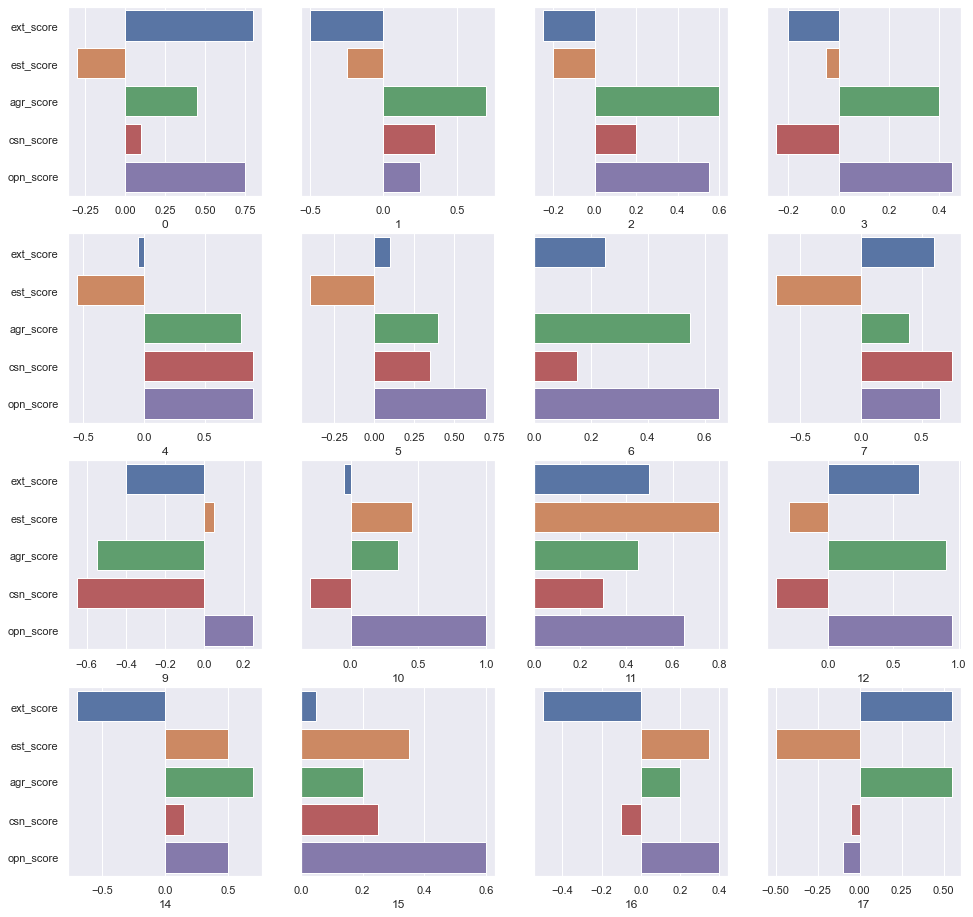

In [22]:
sub_rows = sub_cols = 4
fig, axes = plt.subplots(sub_rows, sub_cols, figsize=(16, 16))
for i in range(sub_rows):
    for j in range(sub_cols):
        sns.barplot(x=data.iloc[sub_rows * i + j, 110:115], y=new_cols, ax=axes[i, j])
        if j != 0:
             axes[i,j].set_yticklabels([])

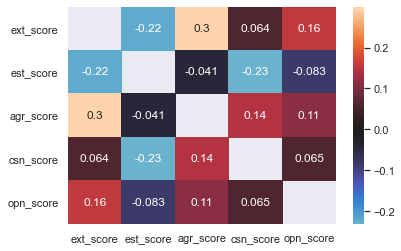

In [23]:
sns.heatmap(data[new_cols].corr(), center=0, annot=True, 
            mask = np.identity(5))  # diagonal elements of corr matrix are 1, remove them from map for better visualization
plt.show()

### Defining 5D distance

In [24]:
def distance_5D(row, labels):
    r = 0
    for label in labels:
        r += row[label] ** 2
    r = np.sqrt(r)
    return r

In [25]:
data['5D_distance'] = data.apply(distance_5D, axis=1, labels=new_cols)
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,ext_score,est_score,agr_score,csn_score,opn_score,5D_distance
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,-2.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991,0.80,-0.30,0.45,0.10,0.75,1.226784
1,0.0,-2.0,0.0,-1.0,0.0,0.0,-1.0,-2.0,-2.0,-2.0,-1.0,0.0,1.0,2.0,0.0,-2.0,-1.0,-2.0,0.0,-2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,-2.0,1.0,1.0,1.0,0.0,2.0,1.0,-1.0,2.0,0.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706,-0.50,-0.25,0.70,0.35,0.25,0.993730
2,-1.0,0.0,1.0,-1.0,0.0,1.0,-2.0,0.0,-1.0,-2.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,-1.0,1.0,0.0,0.0,1.0,1.0,1.0,-1.0,2.0,2.0,-1.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833,-0.25,-0.20,0.60,0.20,0.55,0.897218
3,-1.0,1.0,-1.0,0.0,1.0,1.0,-1.0,-1.0,-2.0,-1.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-1.0,-1.0,1.0,-1.0,-2.0,1.0,-1.0,0.0,-2.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25,-0.20,-0.05,0.40,-0.25,0.45,0.683740
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.0,0.0,-1.0,-2.0,-2.0,2.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,-1.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,684

### Defining 'Extremeness' feature

In [26]:
def is_extreme(row, label):
    return (row[label] > 1)

In [27]:
data['extremeness'] = data.apply(is_extreme, label='5D_distance', axis=1)
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,ext_score,est_score,agr_score,csn_score,opn_score,5D_distance,extremeness
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,-2.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991,0.80,-0.30,0.45,0.10,0.75,1.226784,True
1,0.0,-2.0,0.0,-1.0,0.0,0.0,-1.0,-2.0,-2.0,-2.0,-1.0,0.0,1.0,2.0,0.0,-2.0,-1.0,-2.0,0.0,-2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,-2.0,1.0,1.0,1.0,0.0,2.0,1.0,-1.0,2.0,0.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706,-0.50,-0.25,0.70,0.35,0.25,0.993730,False
2,-1.0,0.0,1.0,-1.0,0.0,1.0,-2.0,0.0,-1.0,-2.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,-1.0,1.0,0.0,0.0,1.0,1.0,1.0,-1.0,2.0,2.0,-1.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833,-0.25,-0.20,0.60,0.20,0.55,0.897218,False
3,-1.0,1.0,-1.0,0.0,1.0,1.0,-1.0,-1.0,-2.0,-1.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-1.0,-1.0,1.0,-1.0,-2.0,1.0,-1.0,0.0,-2.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25,-0.20,-0.05,0.40,-0.25,0.45,0.683740,False
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.0,0.0,-1.0,-2.0,-2.0,2.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,-1.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510